In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [18]:
#trai = pd.read_table("C:\\DM2\\Titanic_train_0.txt", sep=",")
#delimiter="\t"
#sep=" "

In [19]:
train = pd.read_table("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\KAGGLE\\Titanic_train_0.txt", sep=",")
train.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
test = pd.read_table("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\KAGGLE\\Titanic_test_0.txt", sep=",")
test.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [20]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,2,22.0,1,0,7.2500,3
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,3
3,1,1,1,35.0,1,0,53.1000,3
4,0,3,2,35.0,0,0,8.0500,3


In [21]:
#train.corr()

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
Survived    800 non-null int64
Pclass      800 non-null int64
Sex         800 non-null int64
Age         800 non-null float64
SibSp       800 non-null int64
Parch       800 non-null int64
Fare        800 non-null float64
Embarked    800 non-null int64
dtypes: float64(2), int64(6)
memory usage: 50.1 KB


In [23]:
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

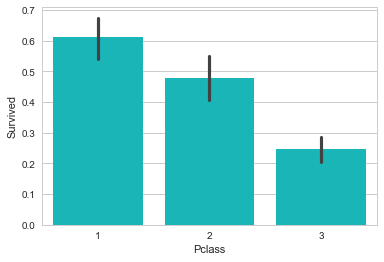

In [24]:
sns.barplot('Pclass', 'Survived', data=train, color="darkturquoise")
plt.show()

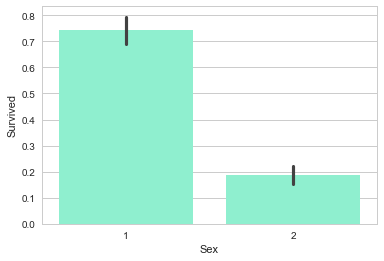

In [25]:
sns.barplot('Sex', 'Survived', data=train, color="aquamarine") ###### aufpassen: 1=female, 2=male
plt.show()

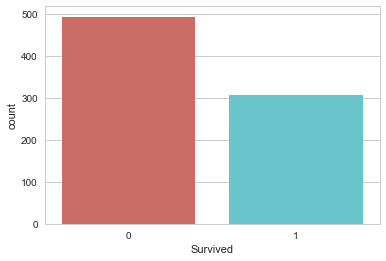

In [26]:
sns.countplot(x='Survived',data=train, palette='hls')

In [27]:
# erst durch .iloc oder .values kann man an die Werte ran kommen!
train_x=train.iloc[:,1:7]
train_Y=train.iloc[:,0]
test_x=test.iloc[:,1:7]
test_Y=test.iloc[:,0]

In [28]:
test_Y #kann man ausgeben lassen

0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
20    1
21    0
22    1
23    0
24    0
25    0
26    1
27    1
28    1
29    1
     ..
59    0
60    1
61    0
62    0
63    1
64    1
65    0
66    0
67    1
68    0
69    1
70    0
71    0
72    1
73    1
74    0
75    0
76    0
77    1
78    1
79    0
80    0
81    0
82    0
83    0
84    0
85    1
86    0
87    1
88    0
Name: Survived, Length: 89, dtype: int64

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
LogReg = LogisticRegression()
LogReg.fit(train_x, train_Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:

# Check trained model intercept
print(LogReg.intercept_)

# Check trained model coefficients
print(LogReg.coef_)

[5.29952544]
[[-0.67452012 -2.27628786 -0.021383   -0.24520561 -0.0893804   0.00553232]]


In [32]:
# Make predictions
y_pred = LogReg.predict(test_x)

In [33]:
# Generate table of predictions vs actual
pd.crosstab(y_pred,test_Y)

Survived,0,1
row_0,,
0,50,11
1,6,22


In [34]:
LogReg.score(test_x, test_Y)  ### auch durch (50+22)/89

0.8089887640449438

ROC AUC: 0.862


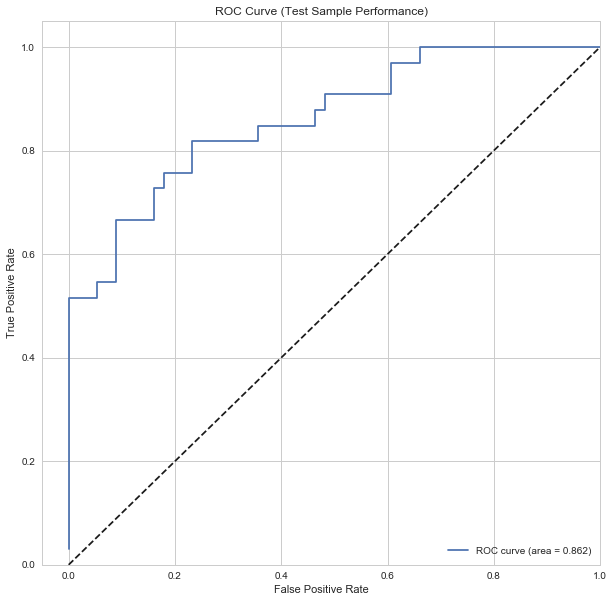

In [35]:
#Visualizing the model's ROC curve (**source for graph code given below the plot)
from sklearn.metrics import roc_curve, auc


probsLogReg = LogReg.predict_proba(test_x)[:,1]

# Determine the false positive and true positive rates
FPR, TPR, _ = roc_curve(test_Y, probsLogReg)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

# Für verschiedene Train/Test Datensätze + mit random seed
ein Modell für alle ausprobieren!

In [36]:
data = pd.read_table("C:\\BÜSRA\\Uni\\Master\\B Fächer\\Data Mining 2\\HELM_2018\\KAGGLE\\Titanic_data.txt", sep=",")
data.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

In [37]:
# define 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked' as the features and Survived as the response
feature_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X = data[feature_cols]
y = data.Survived

# split the data into training and testing sets
from sklearn.cross_validation import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.4, random_state=12345)
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [38]:
#X1_test  # passt mit dimension --also bei 60%(533) train und 40 % test(356) mit von R
# und bei allen Varianten unterschiedliche Zeilen wurden entnommen.

In [39]:
LogReg1 = LogisticRegression()
LogReg1.fit(X1_train, y1_train)

print(LogReg1.intercept_)
print(LogReg1.coef_)

[4.94811492]
[[-0.69863862 -2.05953991 -0.02505105 -0.29327041 -0.12687918  0.00963864
   0.0497222 ]]


In [40]:
y_pred1 = LogReg1.predict(X1_test)

pd.crosstab(y_pred1,y1_test)

Survived,0,1
row_0,,
0,201,43
1,26,86


In [41]:
LogReg1.score(X1_test, y1_test)

0.8061797752808989

ROC AUC: 0.841


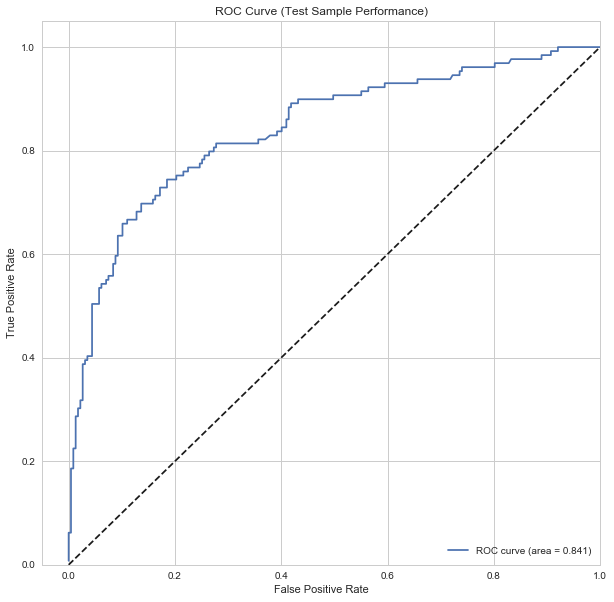

In [42]:
probsLogReg1 = LogReg1.predict_proba(X1_test)[:,1]

FPR, TPR, _ = roc_curve(y1_test, probsLogReg1)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [43]:
LogReg2 = LogisticRegression()
LogReg2.fit(X2_train, y2_train)

print(LogReg2.intercept_)
print(LogReg2.coef_)

[5.15783485]
[[-7.21679436e-01 -2.13894790e+00 -2.28319475e-02 -2.60991131e-01
  -6.53604832e-02  7.32351504e-03 -1.30232295e-03]]


In [44]:
y_pred2 = LogReg2.predict(X2_test)

pd.crosstab(y_pred2,y2_test)

Survived,0,1
row_0,,
0,147,34
1,18,68


In [45]:
LogReg2.score(X2_test, y2_test)

0.8052434456928839

ROC AUC: 0.850


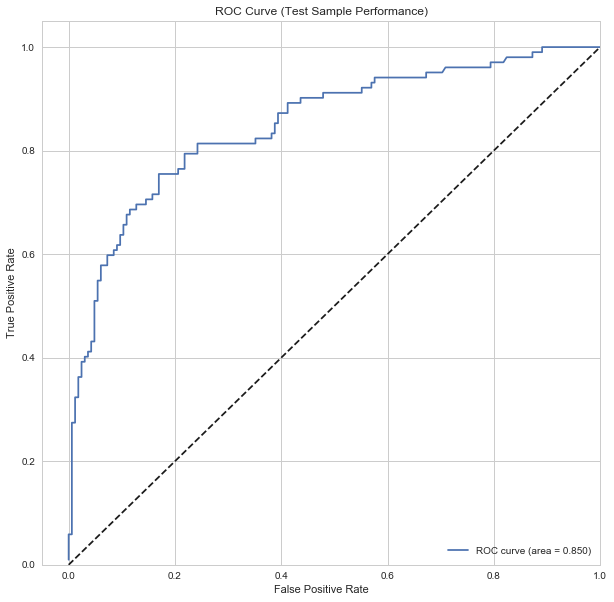

In [46]:
probsLogReg2 = LogReg2.predict_proba(X2_test)[:,1]

FPR, TPR, _ = roc_curve(y2_test, probsLogReg2)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

In [47]:
LogReg3 = LogisticRegression()
LogReg3.fit(X3_train, y3_train)

print(LogReg3.intercept_)
print(LogReg3.coef_)

[5.31975409]
[[-0.67977128 -2.18891008 -0.02467515 -0.28382837 -0.04399703  0.00842633
  -0.05146575]]


In [48]:
y_pred3 = LogReg3.predict(X3_test)

pd.crosstab(y_pred3,y3_test)

Survived,0,1
row_0,,
0,99,23
1,14,42


In [49]:
LogReg3.score(X3_test, y3_test)

0.7921348314606742

ROC AUC: 0.824


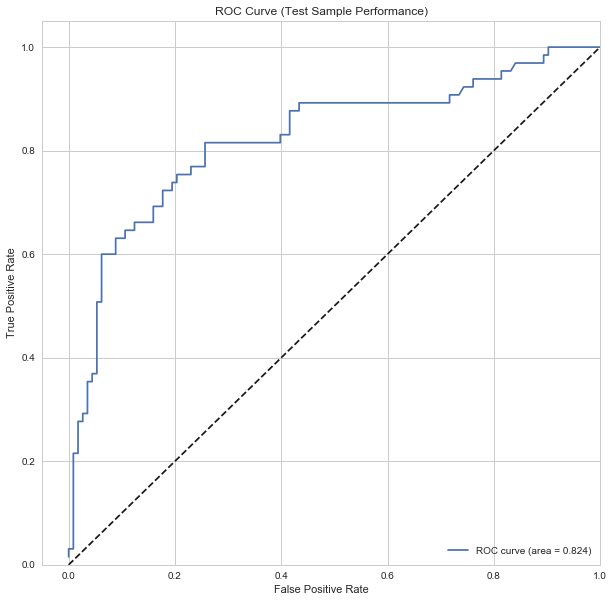

In [50]:
probsLogReg3 = LogReg3.predict_proba(X3_test)[:,1]

FPR, TPR, _ = roc_curve(y3_test, probsLogReg3)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()

# SMOTE

In [51]:
import collections

counter_train=collections.Counter(y1_train)
print(counter_train)

Counter({0: 322, 1: 211})


In [52]:
counter_train2=collections.Counter(y2_train)
print(counter_train2)

Counter({0: 384, 1: 238})


In [53]:
counter_train3=collections.Counter(y3_train)
print(counter_train3)

Counter({0: 436, 1: 275})


In [54]:
from imblearn.over_sampling import SMOTE 
X1_resampled, y1_resampled = SMOTE().fit_sample(X1_train, y1_train)

In [55]:
counter_y1=collections.Counter(y1_resampled)
print(counter_y1)

Counter({0: 322, 1: 322})


In [57]:
LogRegSmote = LogisticRegression()
LogRegSmote.fit(X1_resampled, y1_resampled)

print(LogRegSmote.intercept_)
print(LogRegSmote.coef_)

[5.92210561]
[[-0.77082428 -2.18225719 -0.02908607 -0.2900307  -0.16628743  0.00984382
   0.00947524]]


In [58]:
y_pred1Smote = LogRegSmote.predict(X1_test)

pd.crosstab(y_pred1Smote,y1_test)

Survived,0,1
row_0,,
0,183,32
1,44,97


In [59]:
LogRegSmote.score(X1_test, y1_test)

0.7865168539325843

ROC AUC: 0.842


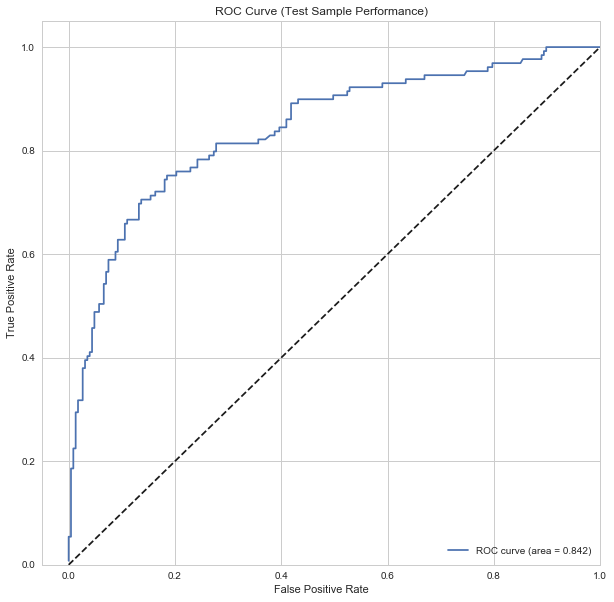

In [60]:
probsLogRegSmote = LogRegSmote.predict_proba(X1_test)[:,1]

FPR, TPR, _ = roc_curve(y1_test, probsLogRegSmote)
 
# Calculate the AUC

roc_auc = auc(FPR, TPR)
print ('ROC AUC: %0.3f' % roc_auc )
 
# Plot of a ROC curve
plt.figure(figsize=(10,10))
plt.plot(FPR, TPR, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Sample Performance)')
plt.legend(loc="lower right")
plt.show()